In [2]:
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

In [18]:
n = 10
def create_matrices(n):
    e = np.zeros(n)
    e.fill(1)

    b = np.zeros(n)
    b[0]=1

    A = 10*np.identity(n)+np.outer(e,b)+np.outer(b,e)
    tilde_A = A[-1::-1, -1::-1]
    return A, tilde_A

A, A_tilde = create_matrices(n)

[Text(0.5, 1.0, 'tilde_A')]

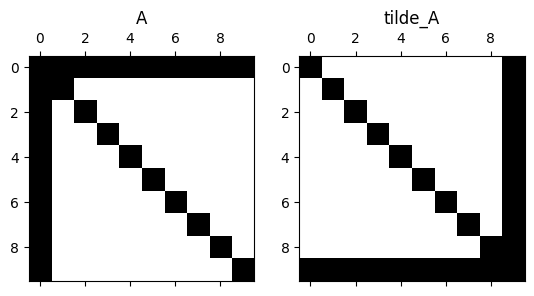

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.spy(A)
ax2.spy(tilde_A)

ax1.set(title='A')
ax2.set(title='tilde_A')

In [20]:
P,L,U = sc.linalg.lu(A)
P_tilde,L_tilde,U_tilde = sc.linalg.lu(tilde_A)


[Text(0.5, 1.0, 'L_tilde')]

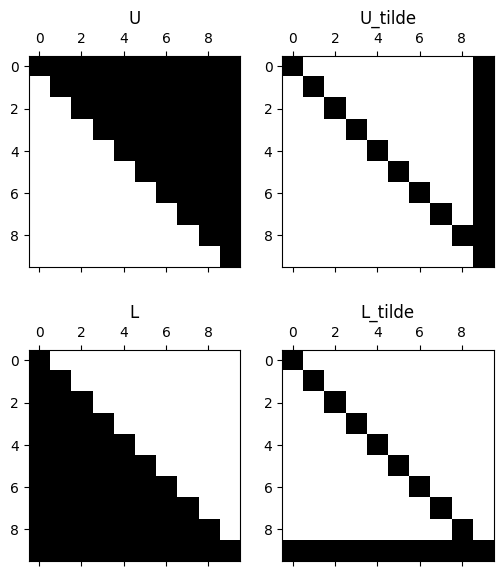

In [21]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(6,7))
ax1.spy(U)
ax2.spy(U_tilde)
ax3.spy(L)
ax4.spy(L_tilde)

ax1.set(title='U')
ax2.set(title='U_tilde')
ax3.set(title='L')
ax4.set(title='L_tilde')

In [8]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import reverse_cuthill_mckee

# If we do not decompose

In [16]:
N = [10,100,1000]
length_of_CuthilMcKee = []
for n in N:
    A, A_tilde =  create_matrices(n)
    temp = [0,0]
    temp[0] = len(reverse_cuthill_mckee(csr_matrix(A)))
    temp[1] = len(reverse_cuthill_mckee(csr_matrix(A_tilde)))
    length_of_CuthilMcKee.append(temp)

In [17]:
length_of_CuthilMcKee

[[10, 10], [100, 100], [1000, 1000]]

# If we desompose

In [26]:
N = [10,100,1000]
length_of_CuthilMcKee = []
for n in N[:1]:
    A, A_tilde =  create_matrices(n)
    P,L,U = sc.linalg.lu(A)
    P_tilde,L_tilde,U_tilde = sc.linalg.lu(A_tilde)
    print(L,U,L_tilde, U_tilde)

    temp = [0,0,0,0]
    
    temp[0] = len(reverse_cuthill_mckee(csr_matrix(L)))
    temp[1] = len(reverse_cuthill_mckee(csr_matrix(U)))
    temp[2] = len(reverse_cuthill_mckee(csr_matrix(L_tilde)))
    temp[3] = len(reverse_cuthill_mckee(csr_matrix(U_tilde)))
    
    length_of_CuthilMcKee.append(temp)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.08333333  1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.08333333 -0.00840336  1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.08333333 -0.00840336 -0.00847458  1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.08333333 -0.00840336 -0.00847458 -0.00854701  1.          0.
   0.          0.          0.          0.        ]
 [ 0.08333333 -0.00840336 -0.00847458 -0.00854701 -0.00862069  1.
   0.          0.          0.          0.        ]
 [ 0.08333333 -0.00840336 -0.00847458 -0.00854701 -0.00862069 -0.00869565
   1.          0.          0.          0.        ]
 [ 0.08333333 -0.00840336 -0.00847458 -0.00854701 -0.00862069 -0.00869565
  -0.00877193  1.          0.          0.        ]
 [ 0.08333333 -0.00840336 -0.00847458 -0.0085470

In [25]:
length_of_CuthilMcKee

[[10, 10, 10, 10], [100, 100, 100, 100], [1000, 1000, 1000, 1000]]

In [27]:
A = np.array([[4,-2,2],[-2,1.001,3],[2,-2,2]])

In [28]:
np.linalg.inv(A)

array([[ 5.00000000e-01,  0.00000000e+00, -5.00000000e-01],
       [ 6.24843789e-01,  2.49937516e-01, -9.99750062e-01],
       [ 1.24843789e-01,  2.49937516e-01,  2.49937516e-04]])